In [5]:
################################
# Solves du/dt = u''           #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['legend.fontsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.
T = 1.
alpha = 0.25


def f(t, *x):
    return np.zeros_like(x[0])


def g(t, *x):
    return np.zeros_like(x[0])


def u0(*x):
    return np.prod(np.sin(np.pi * np.asarray(x)), axis=0)


def exact(t, *x):
    return np.exp(- np.pi ** 2 * alpha * t) * np.prod(np.sin(np.pi * np.asarray(x)), axis=0)

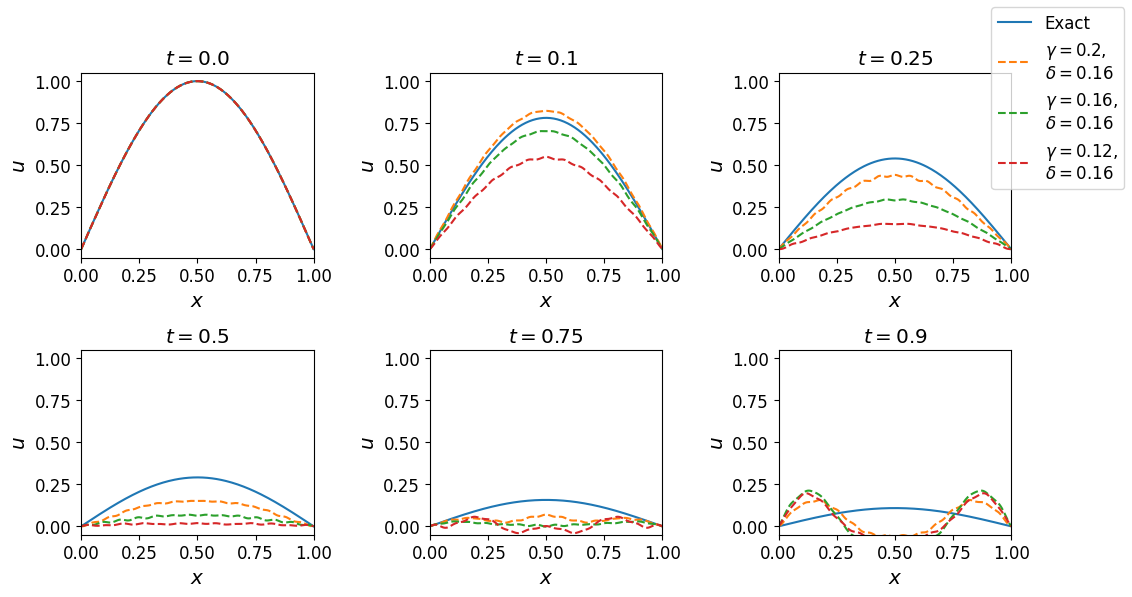

In [6]:
d = 1
k = 2
tN = 50
xN = 50
xranges = ((a, b),) * d
ranges = ((0., T), *xranges)
xc = rad.gridn(ranges, (tN, *((xN,) * d)), flat=True)
Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)
L = lambda func: lambda *x: - alpha * np.sum([func(*x, m=(i, i)) for i in range(1, d+1)], axis=0)
B = lambda func: lambda *x: func(*x)

gammas = [0.2, 0.16, 0.12]
deltas = [0.16, 0.16, 0.16]
approxs = [rad.solve.SpaceTimeCollocation(rad.Wendland(d+1, k, np.array(sp), xc), L, Lidx, B, Bidx).solve(f, g, u0) for sp in zip(gammas, deltas)]

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

x = np.linspace(a, b, 200)
ts = [0., 0.1, 0.25, 0.5, 0.75, 0.9]

for i, ax in enumerate(axs.flat):
    ax.margins(x=0.)
    ax.set_ylim(0. - plt.rcParams["axes.ymargin"], 1. + plt.rcParams["axes.ymargin"])

    ax.plot(x, exact(ts[i], x), label="Exact")

    for approx, gamm, delt in zip(approxs, gammas, deltas):
        ax.plot(x, approx(*np.meshgrid(ts[i], x)), '--', label=f"$\\gamma={gamm},$\n$\\delta={delt}$")

    ax.set_title(f"$t = {ts[i]:.2f}$")
    
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$u$')
    ax.set_title(f"$t = {ts[i]}$")
    
handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig(f"figures/spacetime/scaled-results.pdf", bbox_inches='tight')